# Exploring the solution object

TBD.

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from diffeqzoo import backend, ivps
from jax.config import config

from odefilter import ivpsolve, recipes

backend.select("jax")  # ivp examples in jax


config.update("jax_enable_x64", True)
# config.update("jax_log_compiles", 1)

In [2]:
# Make a problem
f, u0, (t0, t1), f_args = ivps.van_der_pol_first_order()


@jax.jit
def vector_field(y, t, p):
    return f(y, *p)


# Make a solver
ekf0, info_op = recipes.dynamic_ekf1(ode_dimension=2)

In [3]:
%%time
solution = ivpsolve.solve(
    vector_field,
    initial_values=(u0,),
    t0=t0,
    t1=t1,
    solver=ekf0,
    info_op=info_op,
    parameters=f_args,
)

CPU times: user 2.18 s, sys: 9.13 ms, total: 2.19 s
Wall time: 2.1 s


In [4]:
# Look at the solution
print(len(solution))

59


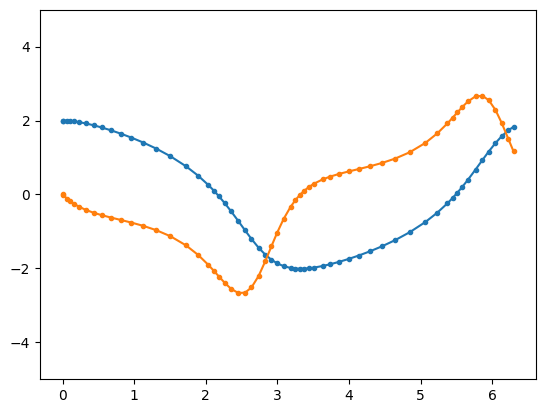

In [5]:
plt.plot(solution.t, solution.u, ".-")
plt.ylim((-5, 5))
plt.show()

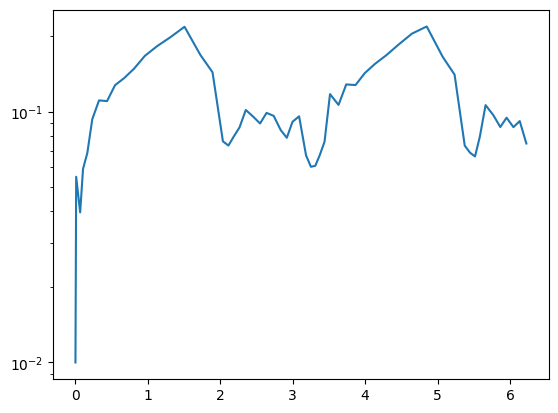

In [6]:
plt.semilogy(solution.t[:-1], jnp.diff(solution.t))
plt.show()